In [1]:
import os

In [2]:
import numpy as np
import scipy.spatial.distance as distance
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
import time

In [4]:
from keras.preprocessing import image

Using TensorFlow backend.


In [5]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [6]:
from utils.visual_utils import plot_clustering

数据载入，生成下边要使用的索引字典。

In [7]:
prd_img_vgg16 = np.load('extract_feature/embedding_vec/20180817.npy')

In [8]:
prd_id_list = np.load('extract_feature/img_name/20180817.npy')

In [14]:
print(len(prd_id_list))

192004


In [10]:
df = pd.read_csv('extract_feature/prd_id_map_dcd_lev.csv')

In [11]:
print('prd num {}'.format(len(prd_img_vgg16)))

prd num 192004


In [12]:
prd_id_img_vgg16 = dict()
for idx in range(len(prd_id_list)):
    prd_id_img_vgg16[prd_id_list[idx]] = prd_img_vgg16[idx]

In [13]:
prd_id_dcd_lev4 = dict()
for dcd_lev4 in set(df.new_dcd_lev4.values):
    prd_id_dcd_lev4[dcd_lev4] = set(df[df.new_dcd_lev4 == dcd_lev4].prd_id.values).intersection(set(prd_id_list))

In [16]:
for dcd_lev4 in prd_id_dcd_lev4:
    print(dcd_lev4, len(prd_id_dcd_lev4[dcd_lev4]))

B43130515 3000
B43050105 2613
B43010115 18
B43071901 525
B43150505 3162
B43072101 369
B43071913 200
B43070501 1
B43110101 2120
B43071905 1497
B43010103 39
B43010105 79
B43050101 1351
B43070707 2980
B43130703 4158
B43150503 610
B43071113 1
B43130509 6351
B43070703 495
B43050103 1702
B43050911 12
B43150901 195
B43150703 9
B43050901 140
B43070301 1257
B43170101 227
B43070717 174
B43070905 457
B43010113 68
B43150305 1480
B43070109 27
B43130513 4154
B43050109 163
B43071109 32
B43071911 2149
B43071701 310
B43130517 31285
B43130521 1330
B43050909 157
B43150701 2007
B43050905 144
B43130903 536
B43071703 19
B43010101 5517
B43150301 732
B43070701 44
B43070715 76
B43150101 2876
B43070111 198
B43010109 551
B43130301 10290
B43071301 1197
B43130511 7738
B43130101 3332
B43071101 72
B43150501 1821
B43070107 365
B43070705 1913
B43071105 12
B43071103 24
B43070103 2359
B43130519 2443
B43050107 4102
B43070105 832
B43070901 475
B43071903 1409
B43070713 57
B43050907 2
B43050503 1643
B43050301 1165
B43130701

# 一、用 T-SNE 对 VGG16 embedding 特征可视化

In [8]:
x_tsne = TSNE(n_components=3, n_jobs=8).fit_transform(prd_img_vgg16)

In [9]:
labels = list()
for prd_id in prd_id_list:
    labels.append(df[df['prd_id']==prd_id].new_dcd_lev2.values[0])

In [35]:
x_tsne[:, 0:3:2]

array([[ 20.73434588, -25.02921467],
       [ -0.32433055,   8.8974349 ],
       [  3.39948245,   5.2520335 ],
       ...,
       [ -0.77500974,  11.97765158],
       [  6.82642501, -17.02465621],
       [ -5.53682216,  26.29324463]])

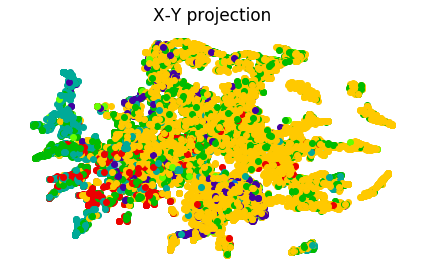

In [17]:
plot_clustering(x=x_tsne[:, 0:2], labels=labels, num_labels=8, title='X-Y projection')

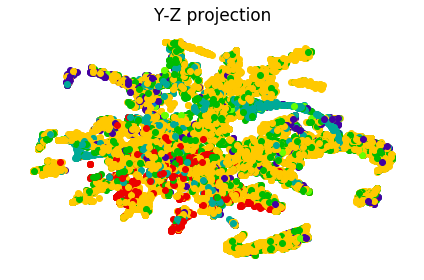

In [28]:
plot_clustering(x=x_tsne[:, 1:3], labels=labels, num_labels=8, title='Y-Z projection')

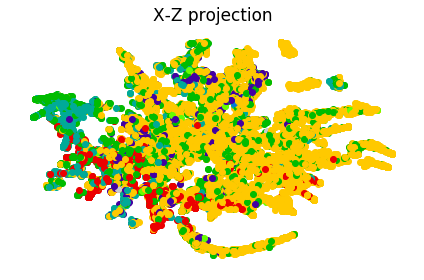

In [36]:
plot_clustering(x=x_tsne[:, 0:3:2], labels=labels, num_labels=8, title='X-Z projection')

# 二、用 VGG16 提取的 embedding 特征寻找最近的物品

In [30]:
import pickle

In [313]:
prd_id_similar = pickle.load(open('B43130517'+'_prd_id_similar_dict', 'rb'))

In [314]:
prd_id_list = prd_id_similar.keys()

In [315]:
img_path = '/home/wutenghu/git_wutenghu/gs_images/pic_43'

In [316]:
prd_id_similar

{31653891: [(30843275, 0.8753595352172852),
  (29071215, 0.8754033446311951),
  (31460175, 0.8760732412338257),
  (31473183, 0.8760732412338257),
  (30193875, 0.8807194232940674),
  (25438503, 0.8839144706726074),
  (31643947, 0.8845234513282776),
  (16193790, 0.8905261754989624),
  (30854710, 0.9015611410140991),
  (31619887, 0.9112312197685242)],
 31625314: [(30570239, 0.9744344353675842),
  (30410255, 0.9753274321556091),
  (30906886, 0.9756373763084412),
  (29281015, 0.9759407043457031),
  (22449348, 0.9776628613471985),
  (31534174, 0.9780644774436951),
  (28151579, 0.980541467666626),
  (29526683, 0.981989860534668),
  (30040946, 0.9838355779647827),
  (27221619, 0.9886435270309448)],
 30867462: [(29676674, 0.9996369481086731),
  (22059399, 0.9996373057365417),
  (30863287, 0.9996423125267029),
  (29320663, 0.9996607899665833),
  (28712759, 0.9996815323829651),
  (22173331, 0.9996875524520874),
  (22250339, 0.9997033476829529),
  (29486291, 0.9997066855430603),
  (22141444, 0.999

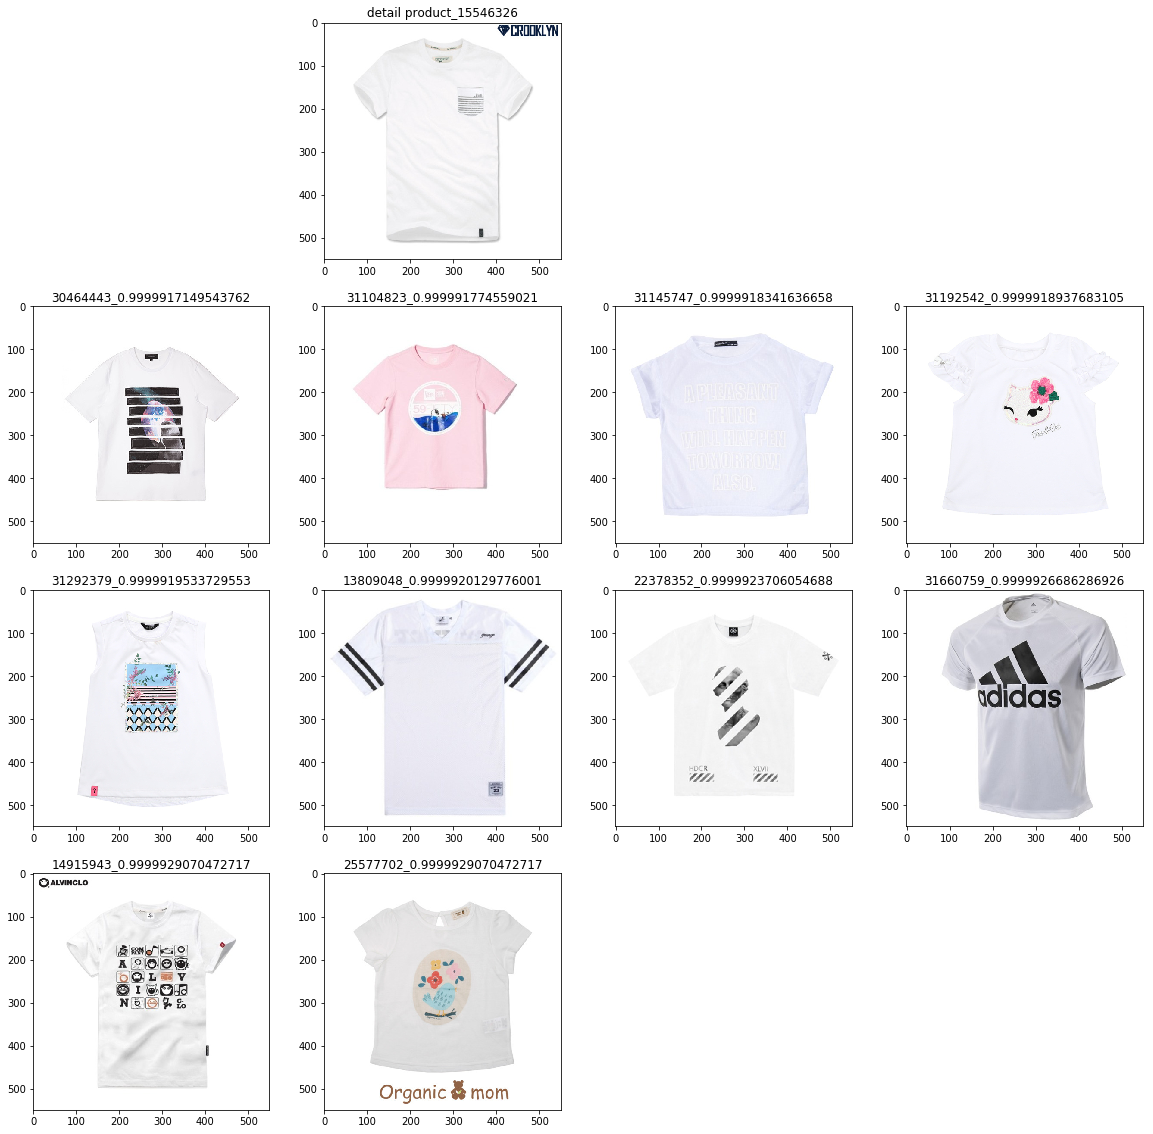

In [322]:
prd_id = random.sample(list(prd_id_list), 1)[0]
file_path = os.path.join(img_path, str(prd_id)+'.jpg')
img = image.load_img(file_path)

plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 2)
plt.imshow(img)
plt.title("detail product_"+str(prd_id))

for idx in range(len(prd_id_similar[prd_id])):
    plt.subplot(4, 4, idx+5)
    file_path = os.path.join(img_path, str(prd_id_similar[prd_id][idx][0])+'.jpg')
    img = image.load_img(file_path)
    plt.imshow(img)
    plt.title(str(prd_id_similar[prd_id][idx][0])+"_"+str(prd_id_similar[prd_id][idx][1]))

plt.show()